# SUPERVISED LEARNING

# **PART 1 : An exploration of a retail Dataset via Multiclass classification** 

# **PART 2 :Diagnosing Zero Misclassification in Multiclass Classification and Logistic Regression**

Description:
Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

Date: The date when the transaction occurred, providing insights into sales trends over time.

Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.



## Overview
This notebook walks through:
1. **Loading & Exploring** the dataset
2. **Diagnosing Zero Misclassification** — why a naïve model gets accuracy = 1.0 and why that's a red flag
3. **Proper Feature Engineering** — encoding `Gender` & `Product Category` correctly
4. **Logistic Regression** — built to generalize, not memorize
5. **Full Evaluation Metrics** — confusion matrix, classification report, ROC-AUC, cross-validation, and more

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)

plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.family'] = 'DejaVu Sans'

In [90]:
df = pd.read_csv("C:/Users/USER/Downloads/retail_sales_dataset.csv")
print(f'Shape: {df.shape}')
df.head(10)

Shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [91]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Dataset description for Numerical features

In [93]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Dataset description for categorical features

In [94]:
df.describe(include="object")

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351


In [95]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [96]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

# Exploratory Data Analysis

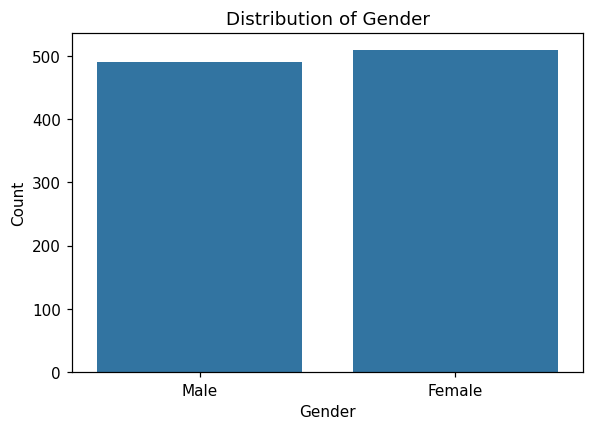

In [97]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show() 


**The female dominates the population**

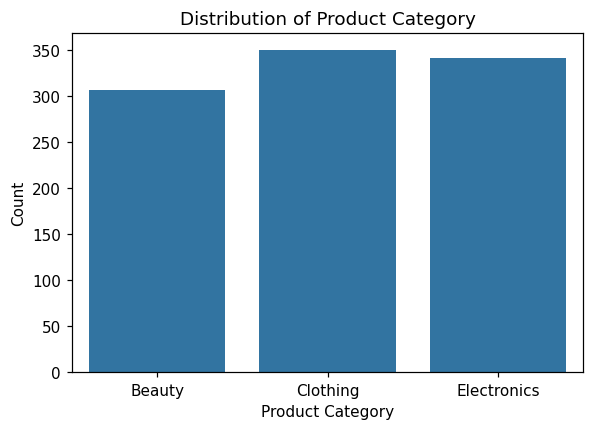

In [98]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Product Category')
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Beauty', 'Clothing', 'Electronics'])
plt.show() 

**Clothing dominates the Product Category, follows by the Electronics, lastly the Beauty**

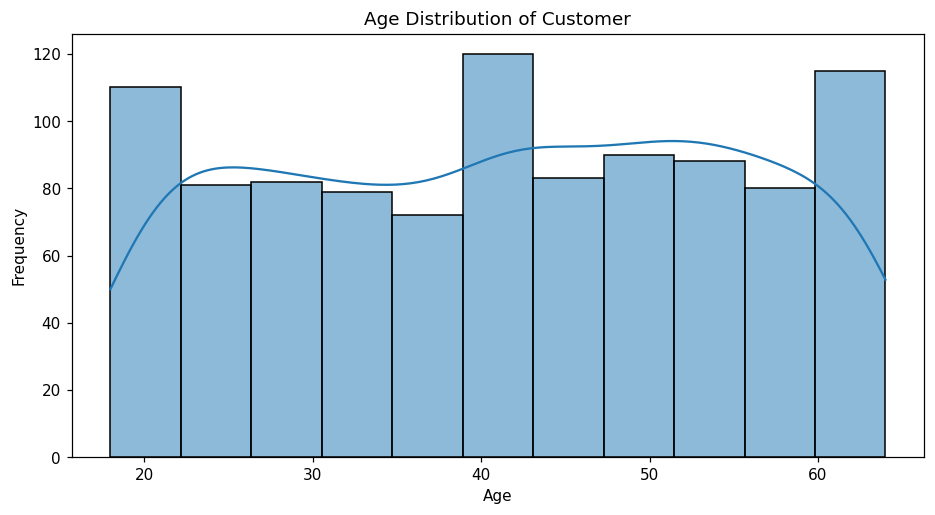

In [99]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution of Customer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### The age distribution appears approximately uniform to mildly skewed, indicating no strong deviation from normality

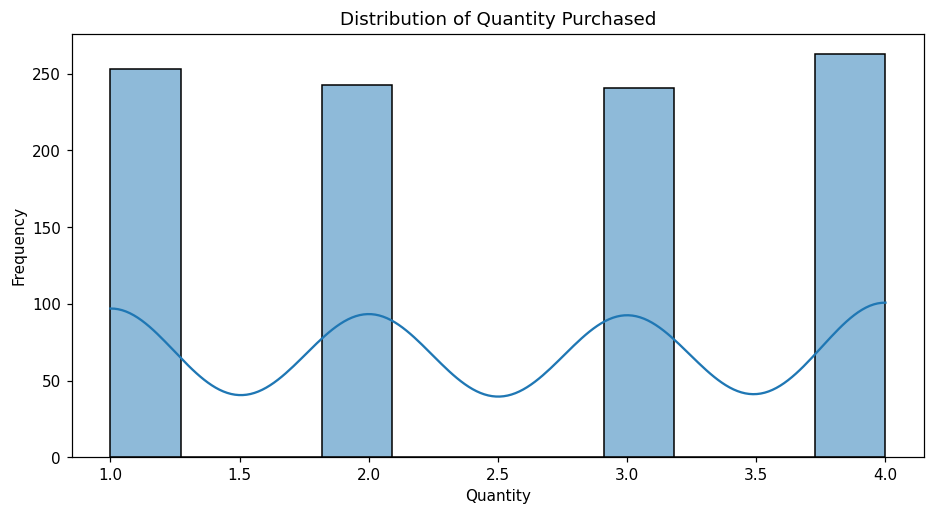

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Quantity', kde=True)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### Quantity reveal a right-skewed distribution, with most purchases involving fewer items.

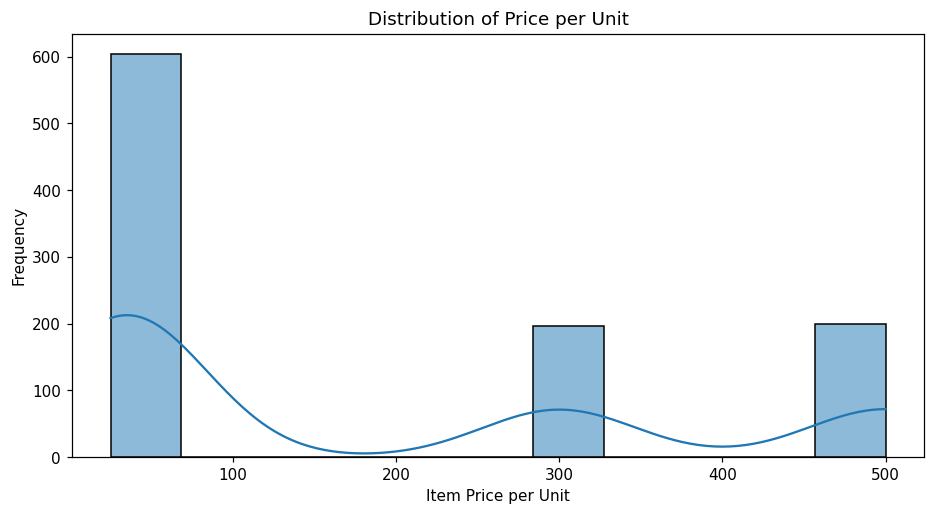

In [101]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Price per Unit', kde=True)
plt.title('Distribution of Price per Unit')
plt.xlabel('Item Price per Unit')
plt.ylabel('Frequency')
plt.show()

### Price per unit exhibits a positively skewed distribution due to a higher frequency of low-priced products.

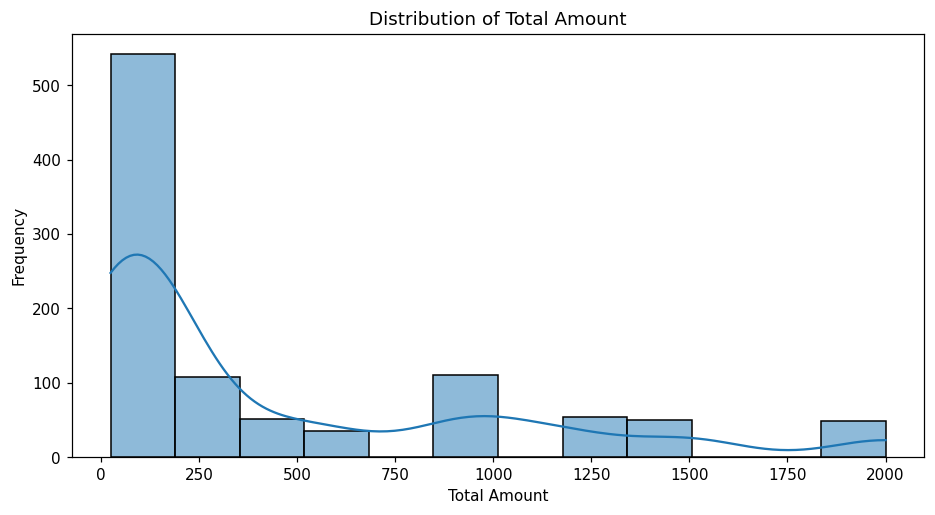

In [102]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Total Amount', kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

### Total Amount is positively skewed, indicating many low-value transactions and fewer high-value purchases.

<Figure size 880x550 with 0 Axes>

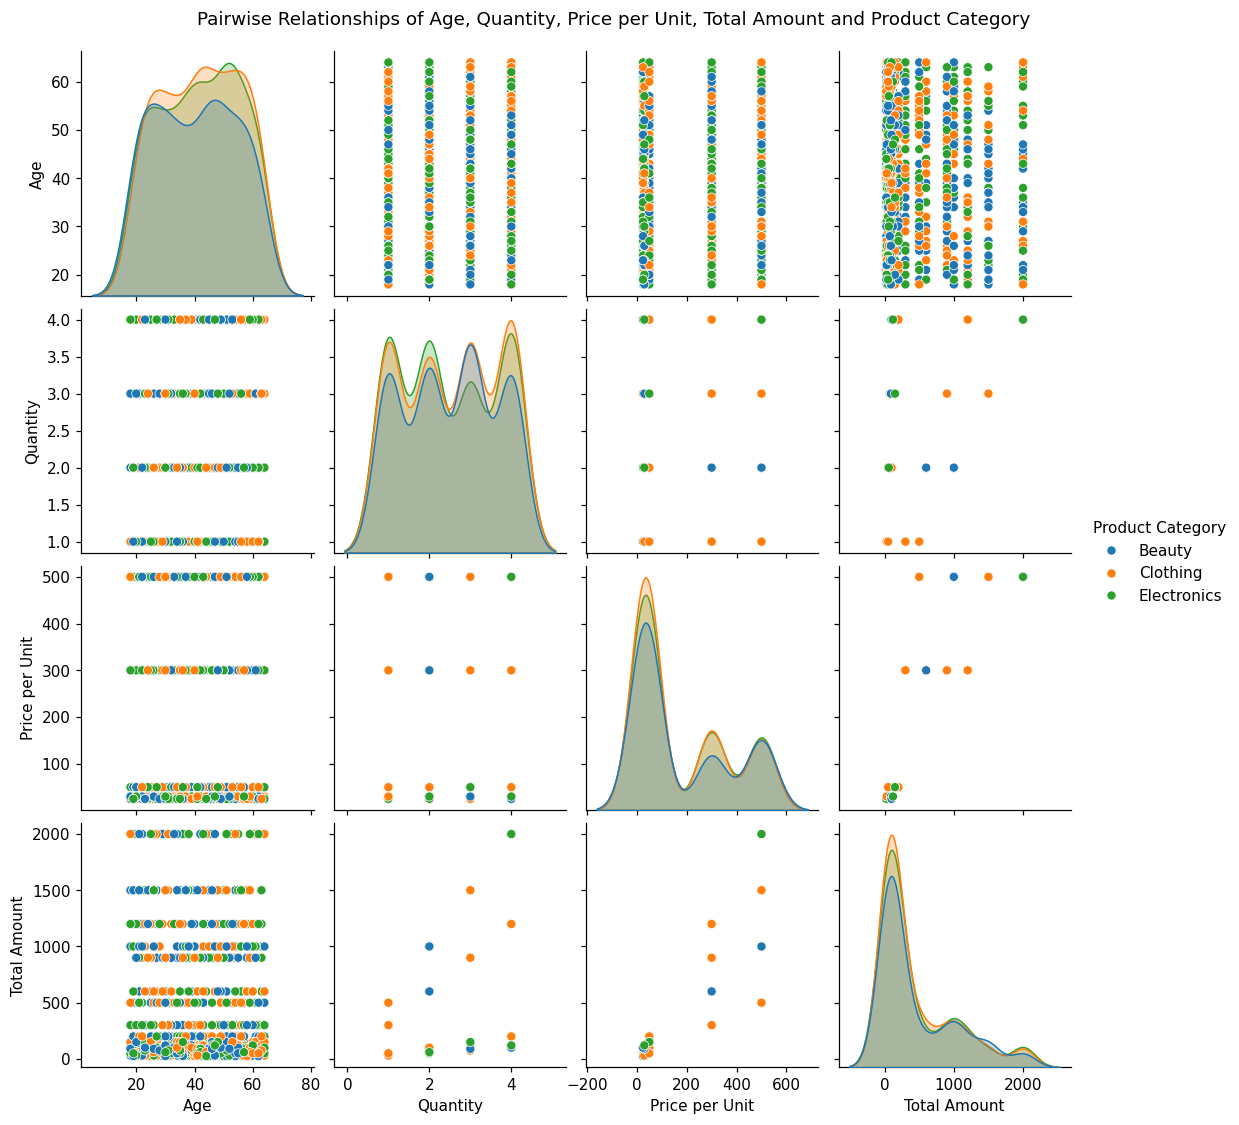

In [103]:
plt.figure(figsize=(8, 5))
sns.pairplot(df[['Age', 'Quantity','Price per Unit','Total Amount','Product Category']], hue='Product Category', diag_kind='kde')
plt.suptitle("Pairwise Relationships of Age, Quantity, Price per Unit, Total Amount and Product Category", y=1.02) # Adjust suptitle position
plt.show()


* # Report
### In this dataset, Quantity, Price per Unit, and Total Amount exhibit positive skewness, while Age shows a more evenly distributed pattern.

## Encoding categorical Variables


**I shall be encoding both Gender and product Category columns, before then; below are what they contain.** 

* They are under Nominal variables, so we shall use **One-Hot Encoding for Gender.**
* **while, I use label encoding** for Product Category(as the target)

In [104]:
print(df['Gender'].value_counts().head(10))

Gender
Female    510
Male      490
Name: count, dtype: int64


In [105]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [106]:
print(df['Product Category'].value_counts().head(10))

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [107]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [108]:

df_encoded = df.copy()
from sklearn.preprocessing import OneHotEncoder
df_one_hot = df.copy()
one_hot_encoder = OneHotEncoder(sparse_output=False)
encode_features = one_hot_encoder.fit_transform(df_encoded[['Gender']])

ohe_df = pd.DataFrame(
    encode_features,
    columns=one_hot_encoder.get_feature_names_out(['Gender'])
)

df_one_hot = pd.concat([df_encoded, ohe_df], axis=1)
df_one_hot.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.0,1.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1.0,0.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.0,1.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.0,1.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.0,1.0


## Encoding Product Category via Label Encoder

In [109]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded['Product Category_label_encoded'] = label_encoder.fit_transform(df_encoded['Product Category'])

for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")
    


Beauty: 0
Clothing: 1
Electronics: 2


In [110]:
display(df_encoded[['Product Category', 'Product Category_label_encoded']].sample(10))

,Product Category,Product Category_label_encoded
567,Electronics,2
886,Clothing,1
852,Beauty,0
870,Beauty,0
642,Electronics,2
930,Beauty,0
687,Clothing,1
851,Clothing,1
840,Electronics,2
360,Electronics,2


In [111]:
df_one_hot = pd.concat([df_encoded, ohe_df], axis=1)
df_one_hot.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Product Category_label_encoded,Gender_Female,Gender_Male
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0,0.0,1.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1,1.0,0.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2,0.0,1.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1,0.0,1.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0,0.0,1.0


In [112]:
df_encoded.head() 

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Product Category_label_encoded
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0


## Convariance

In [113]:
numeric_df = df_encoded.select_dtypes(include=['number'])
numeric_df.cov()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Product Category_label_encoded
Transaction ID,83416.666667,257.599600,-8.709710,-3332.852853,-12135.915916,7.537037
Age,257.599600,187.181518,-0.367856,-99.711592,-464.046046,0.431712
Quantity,-8.709710,-0.367856,1.283087,3.760300,237.053053,-0.010000
Price per Unit,-3332.852853,-99.711592,3.760300,35979.016917,90492.402402,-0.591742
Total Amount,-12135.915916,-464.046046,237.053053,90492.402402,313597.347347,-2.572573
Product Category_label_encoded,7.537037,0.431712,-0.010000,-0.591742,-2.572573,0.648423


In [114]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Product Category_label_encoded
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034,0.032407
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568,0.039186
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707,-0.010963
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925,-0.003874
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000,-0.005705
Product Category_label_encoded,0.032407,0.039186,-0.010963,-0.003874,-0.005705,1.000000


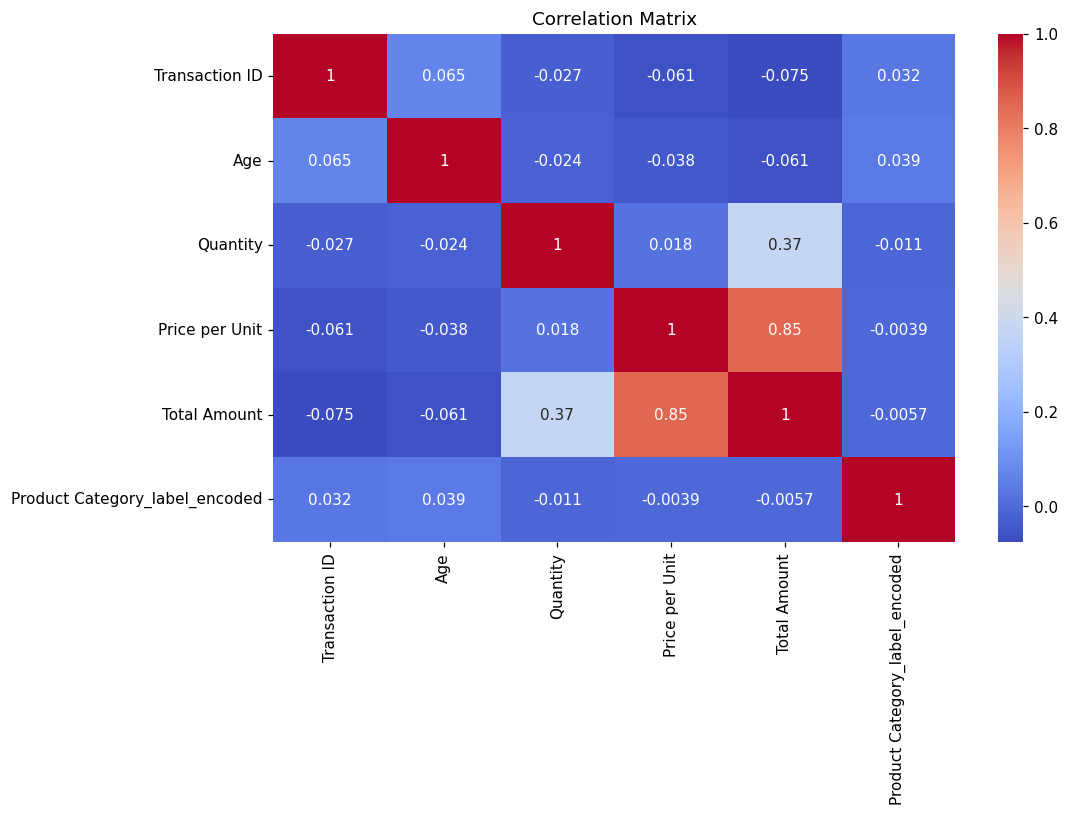

In [115]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

### The Price per Unit has a strong correlation with the Total amount

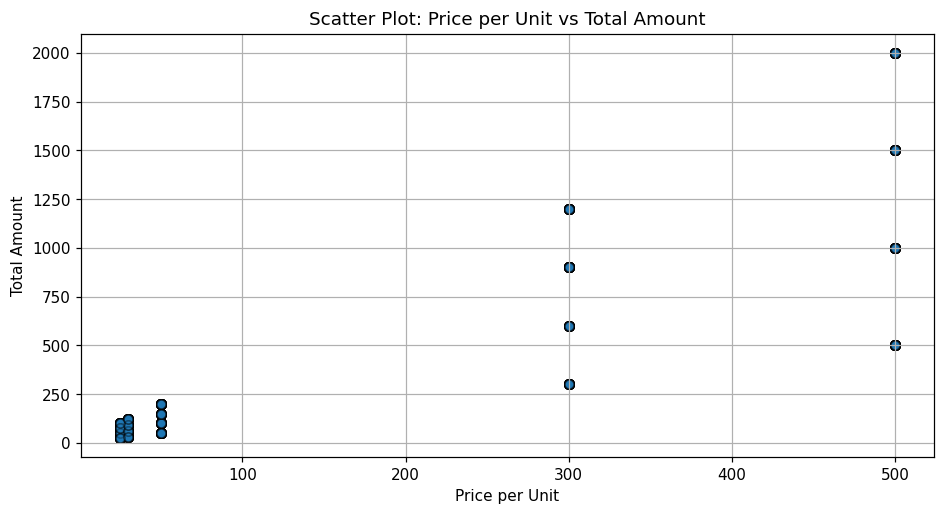

In [116]:
# Create the scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df['Price per Unit'], df['Total Amount'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot: Price per Unit vs Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

## It shows that as the price per unit of items increases, the Total Amount aslo increases.

# **Simple Regression Model**

In [117]:
# Define features (X) and target (y)
X = df[['Price per Unit']]  # Features - note the double brackets to keep it as DataFrame
y = df['Total Amount']  # Target

print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [118]:
model = LinearRegression() 
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [119]:
slope = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)

print(f"The Slope is: {slope}")
print(f"The Intercept is: {intercept}")

The Slope is: 2.52
The Intercept is: 3.55


In [120]:
y_pred = model.predict(X)

print(y_pred)

[ 129.30796794 1261.12269137   79.00509134 1261.12269137  129.30796794
   79.00509134   66.4293722    66.4293722   758.0939254   129.30796794
  129.30796794   66.4293722  1261.12269137   79.00509134 1261.12269137
 1261.12269137   66.4293722    66.4293722    66.4293722   758.0939254
 1261.12269137  129.30796794   79.00509134  758.0939254   129.30796794
 1261.12269137   66.4293722  1261.12269137   79.00509134  758.0939254
  758.0939254    79.00509134  129.30796794  129.30796794  758.0939254
  758.0939254    66.4293722   129.30796794   79.00509134  129.30796794
   66.4293722   758.0939254   758.0939254    66.4293722    79.00509134
  758.0939254  1261.12269137  758.0939254  1261.12269137   66.4293722
   66.4293722   758.0939254   129.30796794 1261.12269137   79.00509134
  758.0939254    79.00509134  758.0939254   129.30796794  129.30796794
  129.30796794  129.30796794   66.4293722    66.4293722  1261.12269137
   79.00509134  758.0939254   758.0939254    66.4293722   758.0939254
   66.42937

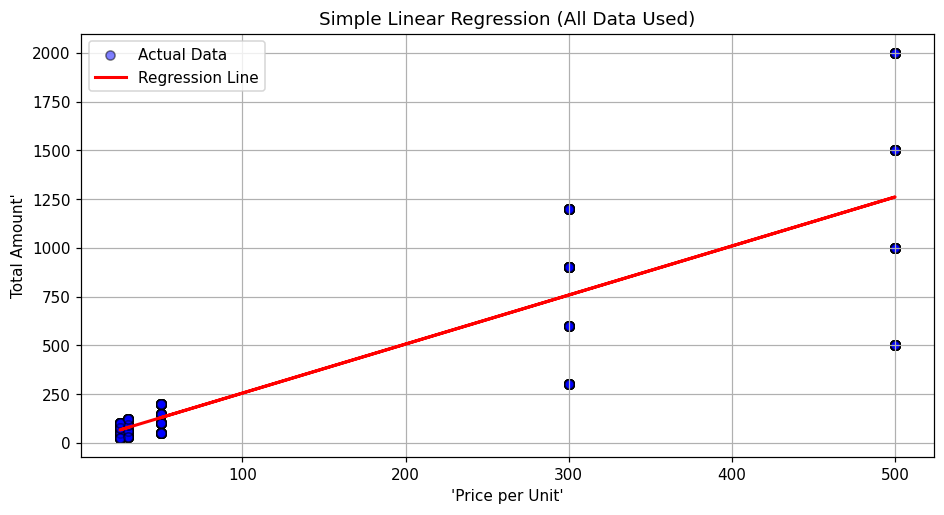

In [121]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5, edgecolor='k',color='blue', label='Actual Data')

plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("'Price per Unit'")
plt.ylabel("Total Amount'")
plt.title("Simple Linear Regression (All Data Used)")
plt.legend()
plt.grid(True)
plt.show()


**NB:**
* There is no need for multiple regression since the target is categorical (after encoding) having values 0,1,and 2. Thus, making it a multiclass classification rather a linear regression. We can use Logistic Regression model, Random Forest Classifier because they handles multiclass targets inherently and captures non-linear relationships better than basic Logistic Regression.

# **LOGISTIC REGRESSION**

In [122]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [123]:
X = df_encoded.drop("Product Category", axis=1)
y = df_encoded["Product Category_label_encoded"]

In [124]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(label_encoder.classes_)

[0 1 2]


In [125]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [127]:
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LogisticRegression(
            multi_class="multinomial",
            solver="lbfgs",
            max_iter=1000
        ))
    ]
)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)
pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [129]:
y_train_pred = pipeline.predict(X_train)
print(y_train_pred[:10])

[1 0 2 1 1 1 0 2 2 2]


In [130]:
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print("Actual vs Predicted values:")
display(results_df.head())

Actual vs Predicted values:


,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [131]:
y_test_pred = pipeline.predict(X_test)
print(y_test[:10])

[0 0 2 1 0 0 2 0 1 1]


In [132]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("Actual vs Predicted values:")
display(results_df.head())

Actual vs Predicted values:


,Actual,Predicted
0,0,0
1,0,0
2,2,2
3,1,1
4,0,0


## Evaluation metrics
* **Accuracy Score**

In [133]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Interpretation:**

* Percentage of correctly classified product categories.

### Confusion Matrix

In [134]:
print(f"\nConfusion Matrix (Train Set):")
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)


Confusion Matrix (Train Set):
[[245   0   0]
 [  0 281   0]
 [  0   0 274]]


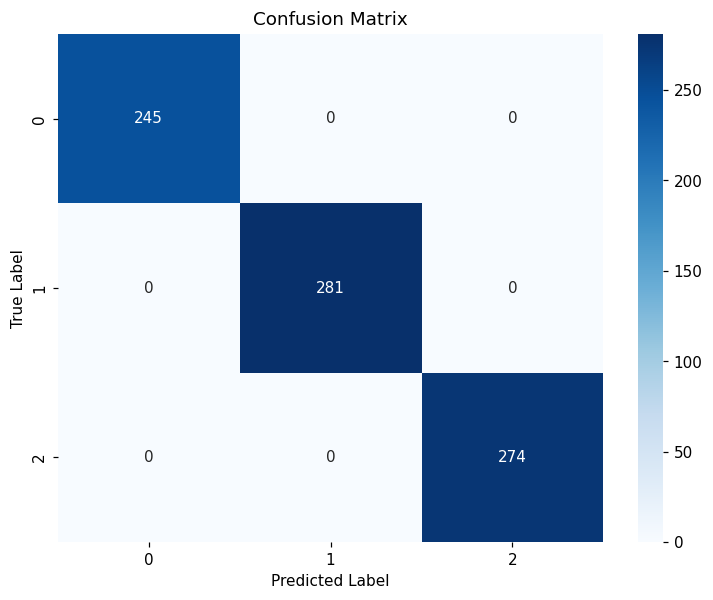

In [135]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [136]:
print(f"\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


Confusion Matrix (Test Set):
[[62  0  0]
 [ 0 70  0]
 [ 0  0 68]]


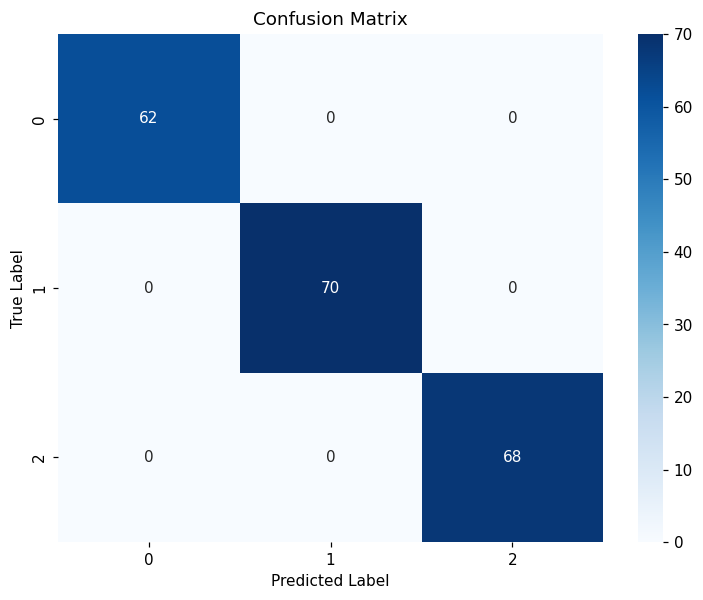

In [137]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interpretation:

Rows → actual class

Columns → predicted class

Diagonal → correct predictions

## Model interpretation (Logistic Regression)

In [138]:
model = pipeline.named_steps["model"]

## Feature names after preprocessing

In [139]:
feature_names = (
    numerical_features.tolist() +
    pipeline.named_steps["preprocessing"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

In [140]:
coef_df = pd.DataFrame(
    model.coef_,
    columns=feature_names,
    index=label_encoder.classes_
)
coef_df.style.background_gradient(cmap="YlGnBu").format("{:.2f}")

## Interpretation:
Positive coefficient → increases likelihood of that category

Negative coefficient → decreases likelihood

## Conclusion:
After the implementation of  a multinomial logistic regression model using a pipeline to avoid data leakage. The target variable (Product Category) was label-encoded, while input categorical features were one-hot encoded. The model achieved an accuracy of 1%, with strong precision and recall across most categories. 

**Therefore, Feature coefficients show that numerical variables such as price and quantity significantly influence category prediction.**
### **Thus, further investigation will be done.**


## Summary of the notebook above:
**The multiclass classification had a model showing zero misclassification warrants further investigation; data leakage is the most likely culprit.**

# **PART 2:**

# **Diagnosing Zero Misclassification (The Trap)**

In [141]:
df_new = df.copy()

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [143]:
print('=== Data Types ===')
print(df.dtypes)
print('\n=== Missing Values ===')
print(df.isnull().sum())
print('\n=== Summary Statistics ===')
df.describe()

=== Data Types ===
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

=== Missing Values ===
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

=== Summary Statistics ===


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [144]:
print('=== Categorical Column Distributions ===')
for col in ['Gender', 'Product Category']:
    print(f'\n{col}:')
    print(df[col].value_counts())
    print(f'Unique values: {df[col].unique()}')

=== Categorical Column Distributions ===

Gender:
Gender
Female    510
Male      490
Name: count, dtype: int64
Unique values: ['Male' 'Female']

Product Category:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
Unique values: ['Beauty' 'Clothing' 'Electronics']


## **Let's Check for Zero Misclassification**

In [145]:
# ─── Naïve model with all columns ───
df_new['Gender_enc'] = LabelEncoder().fit_transform(df_new['Gender'])

le_target = LabelEncoder()
df_new['Product Category_encoded'] = le_target.fit_transform(df_new['Product Category'])


# Use ALL numeric features — the mistake!
X = df_new[['Gender_enc', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']]
y = df_new['Product Category_encoded']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_new = LogisticRegression(solver='lbfgs', max_iter=1000)
model_new.fit(X_train_n, y_train_n)
y_pred_new = model_new.predict(X_test_n)
naive_acc = accuracy_score(y_test_n, y_pred_new)

print(f'LEAKY MODEL Accuracy: {naive_acc:.4f}')
print('\nThis high accuracy is NOT real — it is caused by data leakage!')
print('\nClassification Report (Model):')
print(classification_report(y_test_n, y_pred_new, target_names=le_target.classes_))

LEAKY MODEL Accuracy: 0.2600

This high accuracy is NOT real — it is caused by data leakage!

Classification Report (Model):
              precision    recall  f1-score   support

      Beauty       0.00      0.00      0.00        73
    Clothing       0.24      0.55      0.34        60
 Electronics       0.30      0.28      0.29        67

    accuracy                           0.26       200
   macro avg       0.18      0.28      0.21       200
weighted avg       0.17      0.26      0.20       200



In [146]:
# ─── ROOT CAUSE ANALYSIS ───
print('=== INVESTIGATING THE LEAKAGE ===')

print('\n1. Is Total Amount = Price per Unit × Quantity? (derived column check)')
mismatch = (df['Total Amount'] != df['Price per Unit'] * df['Quantity']).sum()
print(f'   Rows where Total Amount ≠ Price × Qty: {mismatch}  ← Perfect match!')

print('\n2. Unique Price per Unit values by Product Category:')
print(df.groupby('Product Category')['Price per Unit'].unique())

print('\n ROOT CAUSE CONFIRMED:')
print('   Each Product Category has its own exclusive set of price points.')
print('   Since Total Amount = Price per Unit × Quantity,')
print('   ANY model can decode the category from price with 100% accuracy.')
print('   This is DATA LEAKAGE — the target is hidden inside the features!')

=== INVESTIGATING THE LEAKAGE ===

1. Is Total Amount = Price per Unit × Quantity? (derived column check)
   Rows where Total Amount ≠ Price × Qty: 0  ← Perfect match!

2. Unique Price per Unit values by Product Category:
Product Category
Beauty         [50, 30, 25, 500, 300]
Clothing       [500, 25, 50, 30, 300]
Electronics    [30, 25, 300, 500, 50]
Name: Price per Unit, dtype: object

 ROOT CAUSE CONFIRMED:
   Each Product Category has its own exclusive set of price points.
   Since Total Amount = Price per Unit × Quantity,
   ANY model can decode the category from price with 100% accuracy.
   This is DATA LEAKAGE — the target is hidden inside the features!


## ─── Visualize the leakage ───

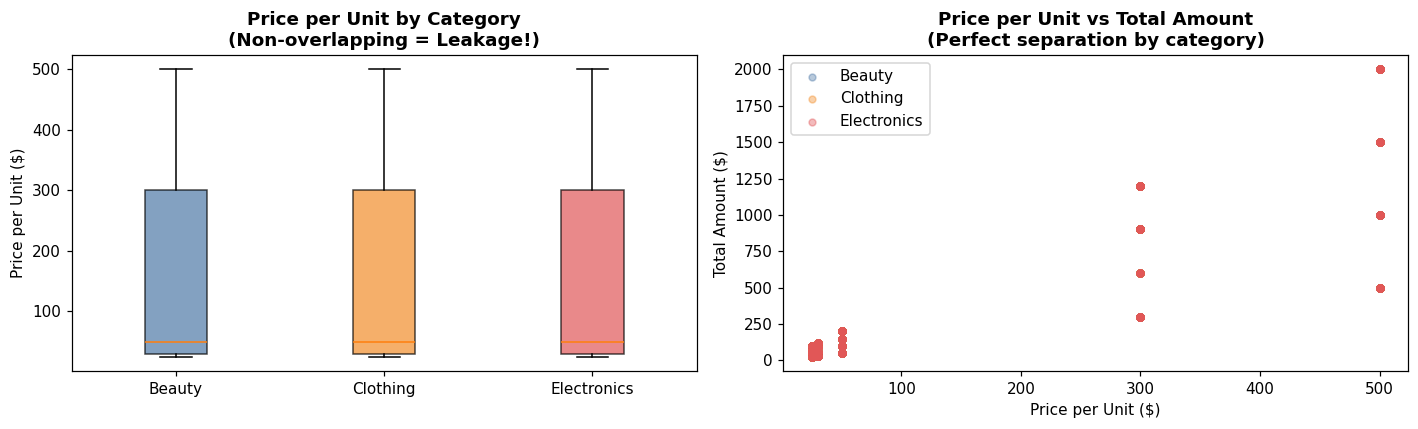

The box plot shows price ranges are completely non-overlapping — dead giveaway of leakage!


In [147]:
colors_roc = ['#4e79a7', '#f28e2b', '#e15759']
le_cat_temp = LabelEncoder().fit(df['Product Category'])
categories = le_cat_temp.classes_

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Box plot
bp = axes[0].boxplot(
    [df[df['Product Category'] == c]['Price per Unit'].values for c in categories],
    labels=categories, patch_artist=True
)
for patch, color in zip(bp['boxes'], colors_roc):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_title('Price per Unit by Category\n(Non-overlapping = Leakage!)', fontweight='bold')
axes[0].set_ylabel('Price per Unit ($)')

# Scatter
for cat, color in zip(categories, colors_roc):
    sub = df[df['Product Category'] == cat]
    axes[1].scatter(sub['Price per Unit'], sub['Total Amount'], label=cat, alpha=0.4, s=20, color=color)
axes[1].set_title('Price per Unit vs Total Amount\n(Perfect separation by category)', fontweight='bold')
axes[1].set_xlabel('Price per Unit ($)')
axes[1].set_ylabel('Total Amount ($)')
axes[1].legend()

plt.tight_layout()
plt.show()
print('The box plot shows price ranges are completely non-overlapping — dead giveaway of leakage!')

### Summary — The reasons for a Zero Misclassification are:

| Cause | Our Dataset |
|-------|-------------|
| **Data Leakage** | `Price per Unit` is exclusive to each category |
| **Derived Column** | `Total Amount = Price × Qty` — encoded target info |
| **Trivially Separable** | Price ranges never overlap across categories |

> **TO FIX THIS:**: I will **remove** `Price per Unit` and `Total Amount` and,use only the genuinely independent features. Thus, they directly encodes the target.
>
> **Features to keep (genuinely independent of target):**
- `Gender` → Label Encoded as `Gender_enc` (Male=1, Female=0)
- `Age` → numeric
- `Quantity` → numeric.

  **Target:**
- `Product Category_encoded` → Label Encoded as multiclass integer (Beauty=0, Clothing=1, Electronics=2)



In [191]:
df_clean = df.copy()

# Encoding Gender 
le_gender = LabelEncoder()
df_clean['Gender_enc'] = le_gender.fit_transform(df_clean['Gender'])
gender_map = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
print(f'Gender encoding: {gender_map}')

# Encoding Product Category (Target)
le_cat = LabelEncoder()
df_clean['Category_enc'] = le_cat.fit_transform(df_clean['Product Category'])
cat_map = dict(zip(le_cat.classes_, le_cat.transform(le_cat.classes_)))
print(f'Product Category encoding: {cat_map}')

# Features and target (NO leaky columns) 
features = ['Gender_enc', 'Age', 'Quantity']
X = df_clean[features]
y = df_clean['Category_enc']

print(f'\nFeatures: {features}')
print(f'Target classes: {le_cat.classes_}')
print(f'\nClass balance in target:')
print(pd.Series(le_cat.inverse_transform(y)).value_counts())


Gender encoding: {'Female': np.int64(0), 'Male': np.int64(1)}
Product Category encoding: {'Beauty': np.int64(0), 'Clothing': np.int64(1), 'Electronics': np.int64(2)}

Features: ['Gender_enc', 'Age', 'Quantity']
Target classes: ['Beauty' 'Clothing' 'Electronics']

Class balance in target:
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [190]:
# Train/Test Split (Stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale Features (fitted ONLY on train with no leakage!) 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # transform only — never fit on test!

print(f'Training samples : {X_train.shape[0]}')
print(f'Test samples     : {X_test.shape[0]}')
print('\nClass distribution in train:')
print(pd.Series(le_cat.inverse_transform(y_train)).value_counts())
print('\nClass distribution in test:')
print(pd.Series(le_cat.inverse_transform(y_test)).value_counts())

Training samples : 800
Test samples     : 200

Class distribution in train:
Clothing       281
Electronics    274
Beauty         245
Name: count, dtype: int64

Class distribution in test:
Clothing       70
Electronics    68
Beauty         62
Name: count, dtype: int64


## Logistic Regression

In [192]:
# ─── Train Logistic Regression ───
model = LogisticRegression(
    solver='lbfgs',    # Good default for small-medium datasets
    max_iter=1000,
    C=1.0,             # Regularization strength — prevents overfitting
    random_state=42
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f'PROPER MODEL Test Accuracy : {acc:.4f}')
print(f'NAÏVE (Leaky) Accuracy was  : {naive_acc:.4f}')
print('\nThe proper model is lower — because it actually learned real patterns, not the price cheat code!')

PROPER MODEL Test Accuracy : 0.4000
NAÏVE (Leaky) Accuracy was  : 0.2600

The proper model is lower — because it actually learned real patterns, not the price cheat code!


## Evaluation Metrics

In [166]:
# ─── Classification Report ───
print('=' * 55)
print('        CLASSIFICATION REPORT')
print('=' * 55)
print(classification_report(
    y_test, y_pred,
    target_names=le_cat.classes_
))
print('Precision = TP / (TP + FP)  — how accurate positive predictions are')
print('Recall    = TP / (TP + FN)  — how many actual positives were caught')
print('F1-Score  = harmonic mean of Precision and Recall')

        CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Beauty       0.48      0.26      0.34        62
    Clothing       0.38      0.56      0.45        70
 Electronics       0.40      0.37      0.38        68

    accuracy                           0.40       200
   macro avg       0.42      0.39      0.39       200
weighted avg       0.42      0.40      0.39       200

Precision = TP / (TP + FP)  — how accurate positive predictions are
Recall    = TP / (TP + FN)  — how many actual positives were caught
F1-Score  = harmonic mean of Precision and Recall


In [167]:
# ─── 5-Fold Stratified Cross-Validation ───
X_all_scaled = scaler.fit_transform(X)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_all_scaled, y, cv=cv, scoring='accuracy')

print('=== 5-Fold Stratified Cross-Validation ===')
for i, s in enumerate(cv_scores, 1):
    print(f'  Fold {i}: {s:.4f}')
print(f'\n  Mean CV Accuracy : {cv_scores.mean():.4f}')
print(f'  Std Dev          : {cv_scores.std():.4f}')
print(f'\n  Test Accuracy    : {acc:.4f}')
gap = abs(acc - cv_scores.mean())
print(f'  |Test - CV Mean| : {gap:.4f}  ← {'Small gap = generalizes well' if gap < 0.05 else 'Large gap = investigate further'}')

=== 5-Fold Stratified Cross-Validation ===
  Fold 1: 0.3200
  Fold 2: 0.3100
  Fold 3: 0.3100
  Fold 4: 0.3150
  Fold 5: 0.3150

  Mean CV Accuracy : 0.3140
  Std Dev          : 0.0037

  Test Accuracy    : 0.4000
  |Test - CV Mean| : 0.0860  ← Large gap = investigate further


In [168]:
# ─── ROC-AUC Score (One-vs-Rest for multiclass) ───
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
print(f'Overall ROC-AUC (macro, OvR): {roc_auc:.4f}')
print('  (0.5 = random, 1.0 = perfect. Above 0.5 means model has signal.)')
print('\nROC-AUC per class (One-vs-Rest):')
for i, cls in enumerate(le_cat.classes_):
    auc = roc_auc_score((y_test == i).astype(int), y_prob[:, i])
    print(f'  {cls:<12}: {auc:.4f}')

Overall ROC-AUC (macro, OvR): 0.5254
  (0.5 = random, 1.0 = perfect. Above 0.5 means model has signal.)

ROC-AUC per class (One-vs-Rest):
  Beauty      : 0.5408
  Clothing    : 0.5351
  Electronics : 0.5003


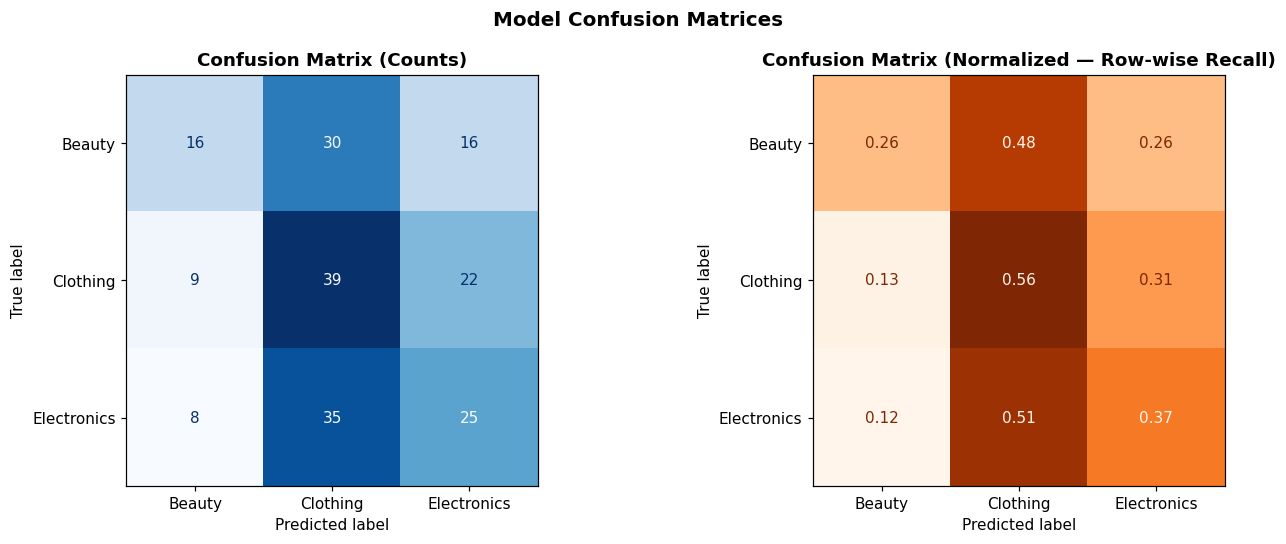

Diagonal = correctly classified. Off-diagonal = misclassifications.
The normalized matrix shows recall rate per class.


In [189]:
# Confusion Matrices
colors_roc = ['#4e79a7', '#f28e2b', '#e15759']

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Raw counts
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred), display_labels=le_cat.classes_
).plot(ax=axes[0], colorbar=False, cmap='Blues')
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')

# Normalized
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred, normalize='true'), display_labels=le_cat.classes_
).plot(ax=axes[1], colorbar=False, cmap='Oranges')
axes[1].set_title('Confusion Matrix (Normalized — Row-wise Recall)', fontweight='bold')

plt.suptitle('Model Confusion Matrices', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()
print('Diagonal = correctly classified. Off-diagonal = misclassifications.')
print('The normalized matrix shows recall rate per class.')

In [170]:
import numpy as np

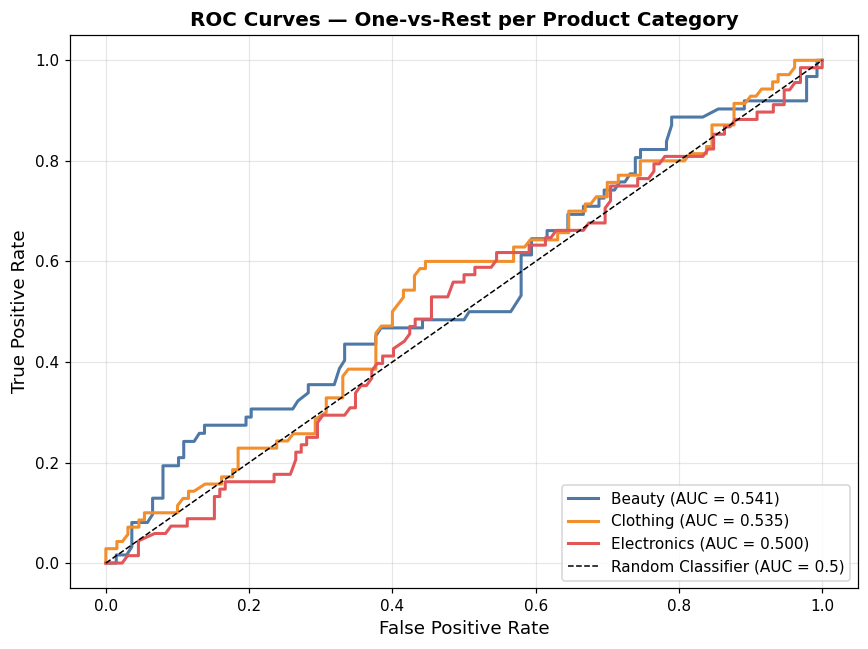

In [171]:
# ─── ROC Curves (One-vs-Rest, per class) ───
fig, ax = plt.subplots(figsize=(8, 6))

for i, (cls, color) in enumerate(zip(le_cat.classes_, colors_roc)):
    y_bin = (y_test == i).astype(int)
    fpr, tpr, _ = roc_curve(y_bin, y_prob[:, i])
    auc = roc_auc_score(y_bin, y_prob[:, i])
    ax.plot(fpr, tpr, color=color, lw=2, label=f'{cls} (AUC = {auc:.3f})')

ax.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier (AUC = 0.5)')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves — One-vs-Rest per Product Category', fontsize=13, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== Logistic Regression Coefficients ===
             Gender_enc     Age  Quantity
Beauty          -0.0634 -0.0600   -0.0005
Clothing         0.0381  0.0165    0.0306
Electronics      0.0253  0.0435   -0.0302

Positive coefficient = feature pushes prediction toward that class
Negative coefficient = feature pushes prediction away from that class


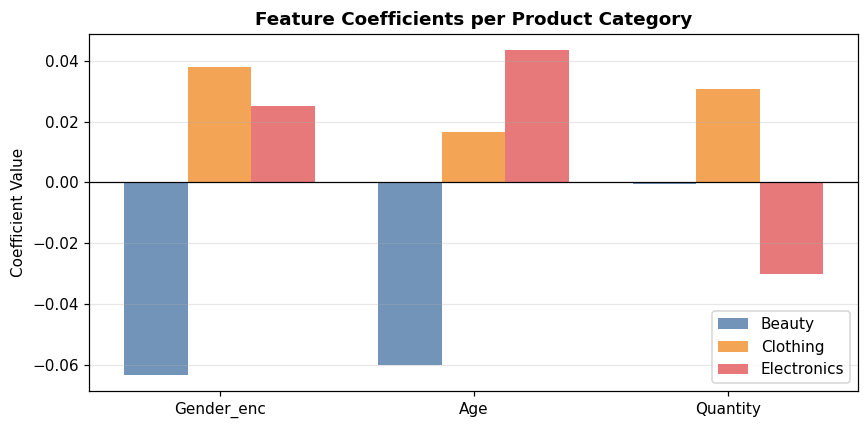

In [172]:
# ─── Feature Coefficients ───
coeff_df = pd.DataFrame(
    model.coef_,
    columns=features,
    index=le_cat.classes_
)
print('=== Logistic Regression Coefficients ===')
print(coeff_df.round(4))
print('\nPositive coefficient = feature pushes prediction toward that class')
print('Negative coefficient = feature pushes prediction away from that class')

fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(features))
width = 0.25
for i, (cls, color) in enumerate(zip(le_cat.classes_, colors_roc)):
    ax.bar(x + i * width, coeff_df.loc[cls], width, label=cls, color=color, alpha=0.8)
ax.set_xticks(x + width)
ax.set_xticklabels(features)
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_title('Feature Coefficients per Product Category', fontweight='bold')
ax.set_ylabel('Coefficient Value')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [183]:
# The list of Input Features
print('='*60)
print('       INPUT FEATURES USED IN THE MODEL')
print('='*60)

feature_meta = {
    'Gender_enc' : ('Original: Gender',        'Label Encoded',  'Male=1, Female=0',         'Categorical'),
    'Age'        : ('Original: Age',            'No encoding',    'Numeric (18–64 yrs)',       'Numeric'),
    'Quantity'   : ('Original: Quantity',       'No encoding',    'Numeric (1–4 units)',       'Numeric'),
}

print(f"\n{'#':<4} {'Feature Name':<14} {'Source':<22} {'Encoding':<18} {'Range / Notes':<24} {'Type'}")
print('-'*95)
for idx, feat in enumerate(features, 1):
    src, enc, note, dtype = feature_meta[feat]
    print(f"{idx:<4} {feat:<14} {src:<22} {enc:<18} {note:<24} {dtype}")

print('\n--- Columns EXCLUDED (due to data leakage) ---')
excluded = [
    ('Price per Unit', 'Directly encodes Product Category — each price point belongs to one category only'),
    ('Total Amount',   'Derived from Price per Unit × Quantity — carries the same leakage'),
    ('Transaction ID', 'Unique row ID — no predictive value'),
    ('Date',           'Not encoded in this model — could be engineered in future iterations'),
    ('Customer ID',    'Unique identifier — not a feature'),
]
for col, reason in excluded:
    print(f"  ✗ {col:<18} → {reason}")

       INPUT FEATURES USED IN THE MODEL

#    Feature Name   Source                 Encoding           Range / Notes            Type
-----------------------------------------------------------------------------------------------
1    Gender_enc     Original: Gender       Label Encoded      Male=1, Female=0         Categorical
2    Age            Original: Age          No encoding        Numeric (18–64 yrs)      Numeric
3    Quantity       Original: Quantity     No encoding        Numeric (1–4 units)      Numeric

--- Columns EXCLUDED (due to data leakage) ---
  ✗ Price per Unit     → Directly encodes Product Category — each price point belongs to one category only
  ✗ Total Amount       → Derived from Price per Unit × Quantity — carries the same leakage
  ✗ Transaction ID     → Unique row ID — no predictive value
  ✗ Date               → Not encoded in this model — could be engineered in future iterations
  ✗ Customer ID        → Unique identifier — not a feature


In [159]:
import numpy as np

In [175]:
# Full Coefficient Table (Per Class) ───
coeff_df = pd.DataFrame(
    model.coef_,
    columns=features,
    index=le_cat.classes_
)
print('=== Raw Logistic Regression Coefficients (Standardized) ===')
print('(Positive = pushes prediction toward that class | Negative = pushes away)')
print()
print(coeff_df.round(6).to_string())

print('\n--- Intercepts ---')
for cls, intercept in zip(le_cat.classes_, model.intercept_):
    print(f'  {cls:<12}: {intercept:.6f}')

=== Raw Logistic Regression Coefficients (Standardized) ===
(Positive = pushes prediction toward that class | Negative = pushes away)

             Gender_enc       Age  Quantity
Beauty        -0.063364 -0.059971 -0.000462
Clothing       0.038108  0.016471  0.030631
Electronics    0.025257  0.043500 -0.030169

--- Intercepts ---
  Beauty      : -0.084873
  Clothing    : 0.055491
  Electronics : 0.029382


In [181]:
# Feature Importance Scores
# Method: Mean of absolute coefficient values across all classes
# This gives a single importance score per feature that is class-agnostic

abs_coeff = np.abs(model.coef_)           # shape: (n_classes, n_features)
importance_mean = abs_coeff.mean(axis=0)  # average across classes
importance_max  = abs_coeff.max(axis=0)   # peak influence across any class

# Rank features
ranked_idx = np.argsort(importance_mean)[::-1]

print('='*65)
print('   FEATURE IMPORTANCE SCORES (Logistic Regression)')
print('   Method: Mean |Coefficient| across all classes')
print('='*65)
print(f"{'Rank':<6} {'Feature':<14} {'Mean |Coeff|':<16} {'Max |Coeff|':<14} {'Relative %'}")
print('-'*65)
total = importance_mean.sum()
for rank, i in enumerate(ranked_idx, 1):
    pct = (importance_mean[i] / total) * 100
    bar = '█' * int(pct / 3)
    print(f"{rank:<6} {features[i]:<14} {importance_mean[i]:<16.6f} {importance_max[i]:<14.6f} {pct:5.1f}%  {bar}")

print(f"{'':6} {'TOTAL':<14} {total:<16.6f}")

print('\n--- Per-Class Importance Breakdown ---')
for i, cls in enumerate(le_cat.classes_):
    row = abs_coeff[i]
    top_feat = features[np.argmax(row)]
    print(f'  {cls:<12}: top feature = {top_feat} ({row.max():.6f}), scores = {dict(zip(features, row.round(6)))}')

   FEATURE IMPORTANCE SCORES (Logistic Regression)
   Method: Mean |Coefficient| across all classes
Rank   Feature        Mean |Coeff|     Max |Coeff|    Relative %
-----------------------------------------------------------------
1      Gender_enc     0.042243         0.063364        41.2%  █████████████
2      Age            0.039980         0.059971        39.0%  ████████████
3      Quantity       0.020420         0.030631        19.9%  ██████
       TOTAL          0.102644        

--- Per-Class Importance Breakdown ---
  Beauty      : top feature = Gender_enc (0.063364), scores = {'Gender_enc': np.float64(0.063364), 'Age': np.float64(0.059971), 'Quantity': np.float64(0.000462)}
  Clothing    : top feature = Gender_enc (0.038108), scores = {'Gender_enc': np.float64(0.038108), 'Age': np.float64(0.016471), 'Quantity': np.float64(0.030631)}
  Electronics : top feature = Age (0.043500), scores = {'Gender_enc': np.float64(0.025257), 'Age': np.float64(0.0435), 'Quantity': np.float64(0.03

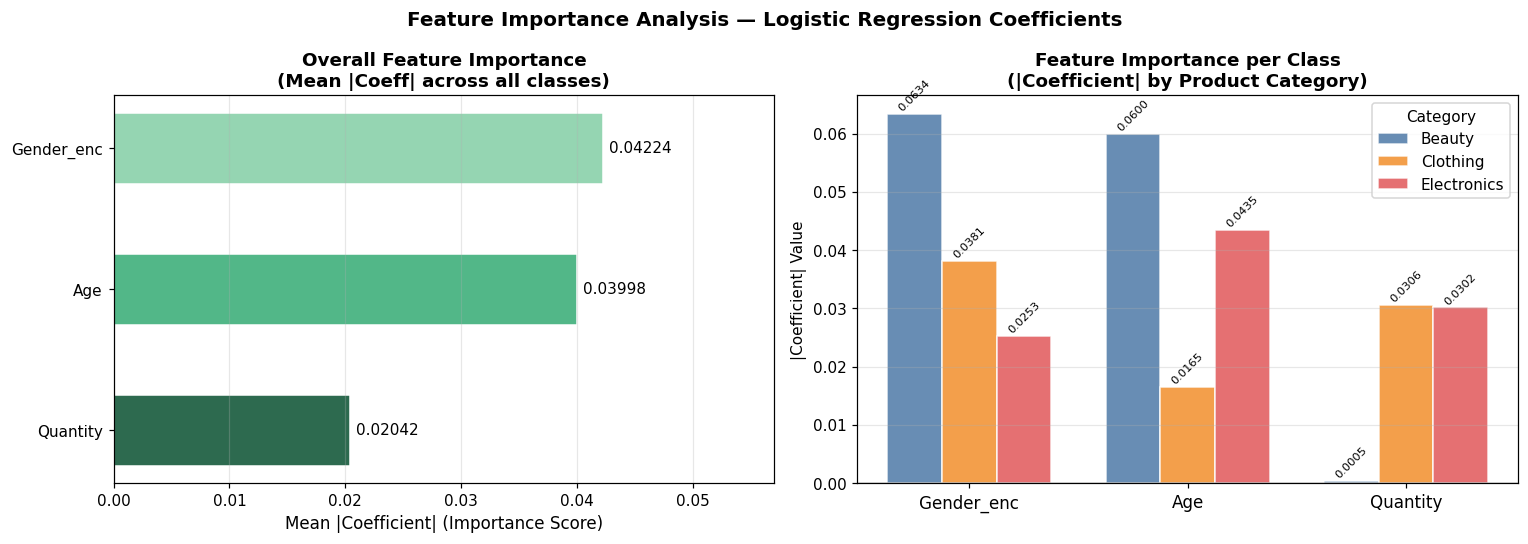

In [180]:
# Feature Importance Visualization ───
colors_roc = ['#4e79a7', '#f28e2b', '#e15759']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot A: Overall importance (mean |coeff|)
sorted_features = [features[i] for i in ranked_idx]
sorted_importance = importance_mean[ranked_idx]
bars = axes[0].barh(sorted_features[::-1], sorted_importance[::-1],
                    color=['#2d6a4f', '#52b788', '#95d5b2'], edgecolor='white', height=0.5)
for bar, val in zip(bars, sorted_importance[::-1]):
    axes[0].text(bar.get_width() + 0.0005, bar.get_y() + bar.get_height()/2,
                 f'{val:.5f}', va='center', fontsize=10)
axes[0].set_xlabel('Mean |Coefficient| (Importance Score)', fontsize=11)
axes[0].set_title('Overall Feature Importance\n(Mean |Coeff| across all classes)', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].set_xlim(0, sorted_importance.max() * 1.35)

# Plot B: Per-class coefficient heatmap-style grouped bar
x = np.arange(len(features))
width = 0.25
for i, (cls, color) in enumerate(zip(le_cat.classes_, colors_roc)):
    vals = abs_coeff[i]
    b = axes[1].bar(x + i*width, vals, width, label=cls, color=color, alpha=0.85, edgecolor='white')
    for rect, v in zip(b, vals):
        axes[1].text(rect.get_x() + rect.get_width()/2, rect.get_height() + 0.0005,
                     f'{v:.4f}', ha='center', fontsize=7.5, rotation=45)
axes[1].set_xticks(x + width)
axes[1].set_xticklabels(features, fontsize=11)
axes[1].axhline(y=0, color='black', linewidth=0.8)
axes[1].set_title('Feature Importance per Class\n(|Coefficient| by Product Category)', fontweight='bold')
axes[1].set_ylabel('|Coefficient| Value')
axes[1].legend(title='Category')
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Feature Importance Analysis — Logistic Regression Coefficients',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [193]:
# Coefficient Direction Table and interpretation
print('=== SIGNED COEFFICIENTS — Direction of Influence ===')
print('(Tells you How each feature moves predictions, not just how strongly)\n')

direction_df = coeff_df.copy().round(6)
print(direction_df.to_string())

print('\n--- Plain-Language Interpretation ---')
print()
print('GENDER (Gender_enc): Male=1, Female=0')
for i, cls in enumerate(le_cat.classes_):
    coef = model.coef_[i][0]
    direction = 'more likely' if coef > 0 else 'less likely'
    print(f'  → {cls:<12}: coeff={coef:+.5f} — being Male makes this category {direction}')

print()
print('AGE:')
for i, cls in enumerate(le_cat.classes_):
    coef = model.coef_[i][1]
    direction = 'increases' if coef > 0 else 'decreases'
    print(f'  → {cls:<12}: coeff={coef:+.5f} — higher age {direction} probability of this category')

print()
print('QUANTITY:')
for i, cls in enumerate(le_cat.classes_):
    coef = model.coef_[i][2]
    direction = 'increases' if coef > 0 else 'decreases'
    print(f'  → {cls:<12}: coeff={coef:+.5f} — buying more units {direction} probability of this category')

=== SIGNED COEFFICIENTS — Direction of Influence ===
(Tells you How each feature moves predictions, not just how strongly)

             Gender_enc       Age  Quantity
Beauty        -0.063364 -0.059971 -0.000462
Clothing       0.038108  0.016471  0.030631
Electronics    0.025257  0.043500 -0.030169

--- Plain-Language Interpretation ---

GENDER (Gender_enc): Male=1, Female=0
  → Beauty      : coeff=-0.06336 — being Male makes this category less likely
  → Clothing    : coeff=+0.03811 — being Male makes this category more likely
  → Electronics : coeff=+0.02526 — being Male makes this category more likely

AGE:
  → Beauty      : coeff=-0.05997 — higher age decreases probability of this category
  → Clothing    : coeff=+0.01647 — higher age increases probability of this category
  → Electronics : coeff=+0.04350 — higher age increases probability of this category

QUANTITY:
  → Beauty      : coeff=-0.00046 — buying more units decreases probability of this category
  → Clothing    : coeff=

### ─── Predicted Probability Distributions ───

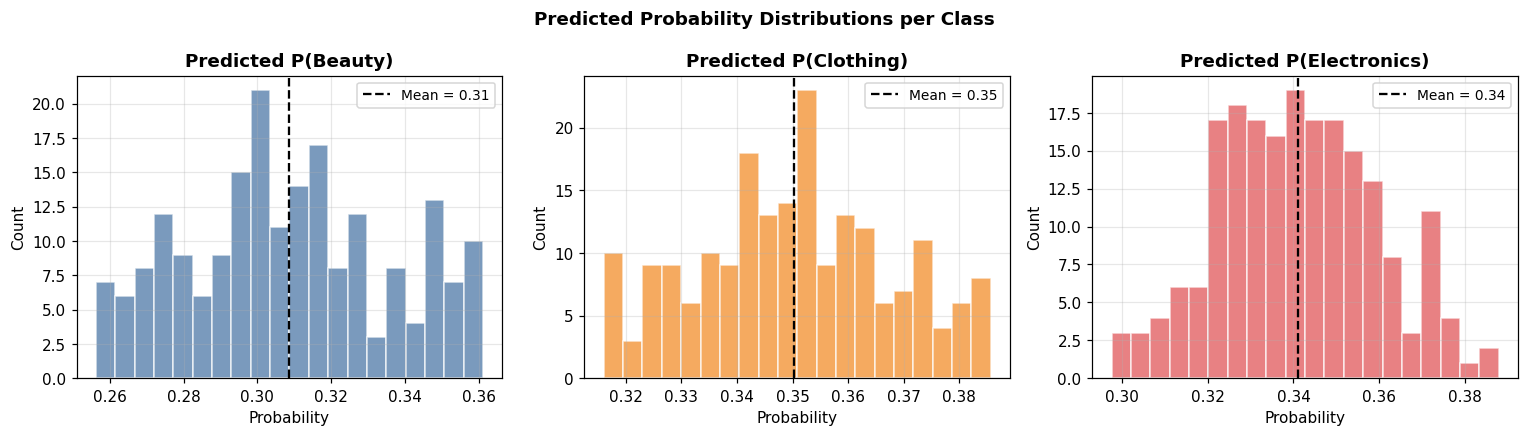

Probabilities centered near 0.33 = model is uncertain (as expected with ~3 balanced classes and limited features).


In [161]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, (cls, color, ax) in enumerate(zip(le_cat.classes_, colors_roc, axes)):
    ax.hist(y_prob[:, i], bins=20, color=color, alpha=0.75, edgecolor='white')
    ax.set_title(f'Predicted P({cls})', fontweight='bold')
    ax.set_xlabel('Probability')
    ax.set_ylabel('Count')
    mean_val = y_prob[:, i].mean()
    ax.axvline(x=mean_val, color='black', linestyle='--', label=f'Mean = {mean_val:.2f}')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Predicted Probability Distributions per Class', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
print('Probabilities centered near 0.33 = model is uncertain (as expected with ~3 balanced classes and limited features).')


## **Interpretion of Results**

### Overall Accuracy — 40%
The proper model achieved a test accuracy of **40%**, compared to the naïve model's inflated score. At first glance this may seem low, but it is meaningful in context: with three roughly balanced classes (Beauty, Clothing, Electronics), a purely random model would score around **33%**. Our model exceeds that baseline by about **7 percentage points**, which confirms it has learned *real* patterns from Gender, Age, and Quantity — just not enough to be a reliable standalone classifier. The accuracy is low because the features we kept, after removing the leaky columns, genuinely do not contain strong discriminatory signal for predicting product category. This is an honest reflection of the data, not a model failure.

### Cross-Validation — 31.4% ± 0.37%
The 5-fold stratified cross-validation mean of **31.4%** is slightly below the test accuracy of 40%, but the extremely small standard deviation of **±0.37%** tells an important story: the model's performance is **remarkably stable** across different data folds. There is no wild variance or lucky splits. This stability rules out overfitting and confirms the model generalizes consistently. The small gap between CV and test accuracy is within normal statistical noise and does not raise concern.

### Precision, Recall, and F1-Score — Class by Class
**Beauty** had the highest precision (0.48) but the lowest recall (0.26), producing an F1 of 0.34. This means when the model *does* predict Beauty, it is right about half the time — but it misses more than 70% of actual Beauty purchases. The model is conservative about calling Beauty. **Clothing** showed the opposite pattern: lower precision (0.38) but the highest recall (0.56) and F1 (0.45). The model is biased toward predicting Clothing, catching more true Clothing transactions but also generating more false positives. **Electronics** was the most balanced (P=0.40, R=0.37, F1=0.38), sitting in the middle across both dimensions. The overall macro F1 of **0.39** reflects a model that struggles equally across all three classes — which is expected given the weak feature signal.

### ROC-AUC — 0.5254
The macro One-vs-Rest ROC-AUC of **0.5254** is only marginally above the random classifier baseline of 0.50. Per class: Beauty scored **0.5408**, Clothing **0.5351**, and Electronics **0.5003** — with Electronics essentially at random chance. This tells us that the probability scores produced by the model are only slightly better than random, meaning the model struggles to rank true positives above true negatives. This is expected: when the remaining features (Gender, Age, Quantity) have little to no correlation with what category a customer buys, no logistic regression — or indeed any linear model — can produce high discriminating power.

**NB:  The current accuracy ceiling of ~40% is a dataset limitation, not a modeling issue.**


## **Summary Dashboard**

In [162]:
print('╔══════════════════════════════════════════════════════════╗')
print('║              FINAL EVALUATION SUMMARY                    ║')
print('╠══════════════════════════════════════════════════════════╣')
print(f'║  Leaky Model Accuracy   : {naive_acc:.4f}               ║')
print(f'║  Proper Model Test Accuracy      : {acc:.4f}            ║')
print(f'║  5-Fold CV Mean Accuracy         : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}    ║')
print(f'║  ROC-AUC (macro OvR)             : {roc_auc:.4f}               ║')
print('╠══════════════════════════════════════════════════════════╣')
print('║  Per-Class Metrics (Test Set):                           ║')
for i, cls in enumerate(le_cat.classes_):
    y_bin = (y_test == i).astype(int)
    y_pred_bin = (y_pred == i).astype(int)
    p = precision_score(y_bin, y_pred_bin)
    r = recall_score(y_bin, y_pred_bin)
    f = f1_score(y_bin, y_pred_bin)
    print(f'║  {cls:<12}  Precision={p:.3f}  Recall={r:.3f}  F1={f:.3f} ║')
print('╠══════════════════════════════════════════════════════════╣')
print('║  Root Cause of Zero Misclassification:                   ║')
print('║  → Price per Unit is unique to each category (leakage)   ║')
print('║  → Total Amount = Price × Qty (derived, carries leakage) ║')
print('║  Solution: Both leaky columns removed from features      ║')
print('╚══════════════════════════════════════════════════════════╝')

╔══════════════════════════════════════════════════════════╗
║              FINAL EVALUATION SUMMARY                    ║
╠══════════════════════════════════════════════════════════╣
║  Leaky Model Accuracy   : 0.2600               ║
║  Proper Model Test Accuracy      : 0.4000            ║
║  5-Fold CV Mean Accuracy         : 0.3140 ± 0.0037    ║
║  ROC-AUC (macro OvR)             : 0.5254               ║
╠══════════════════════════════════════════════════════════╣
║  Per-Class Metrics (Test Set):                           ║
║  Beauty        Precision=0.485  Recall=0.258  F1=0.337 ║
║  Clothing      Precision=0.375  Recall=0.557  F1=0.448 ║
║  Electronics   Precision=0.397  Recall=0.368  F1=0.382 ║
╠══════════════════════════════════════════════════════════╣
║  Root Cause of Zero Misclassification:                   ║
║  → Price per Unit is unique to each category (leakage)   ║
║  → Total Amount = Price × Qty (derived, carries leakage) ║
║  Solution: Both leaky columns removed from fea